In [5]:
import tensorflow as tf
import numpy as np

print(f"[+] Version: {np.__version__}")
print(f"[+] Version: {tf.__version__}")

[+] Version: 1.19.4
[+] Version: 2.4.0


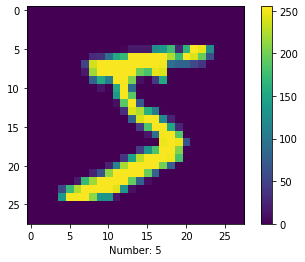

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

"""
    - Retrive data and assign each matrix(list, in terms of python) to proper 
    matrix(list)
"""

"""
    ##### Exmaple 12
"""
[train_images, train_labels], [test_images, test_labels] = mnist.load_data()

"""
    - Plot first train_images of mnist datas for better visualization
"""
plt.figure()
plt.imshow(train_images[0])
plt.xlabel(f"Number: {train_labels[0]}")
# plt.xlabel("Number: " + str(train_labels[0]) )     # Simple way
plt.colorbar()
plt.show()

#print(train_images[0])


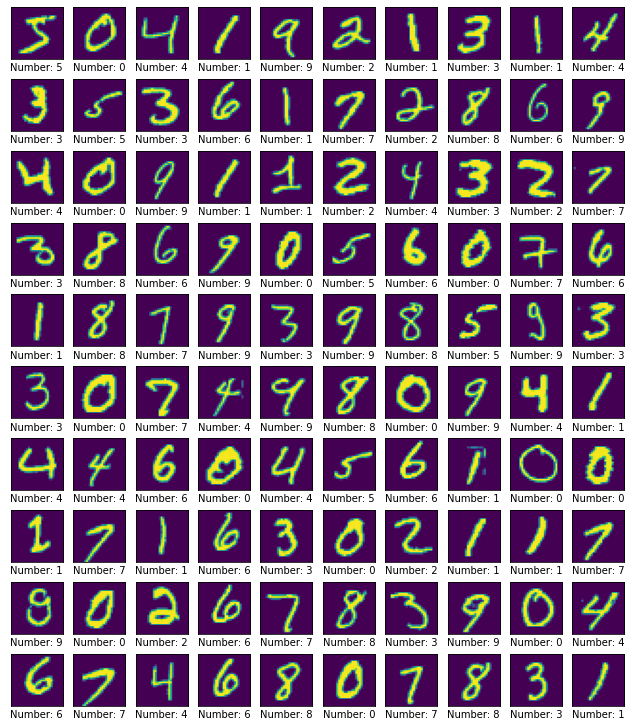

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

[train_images, train_labels], [test_images, test_labels] = mnist.load_data()

# Defining new generated
plt.figure(figsize=(11, 13))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow( train_images[i] )
    plt.xlabel( f"Number: {train_labels[i]}" )

plt.show()

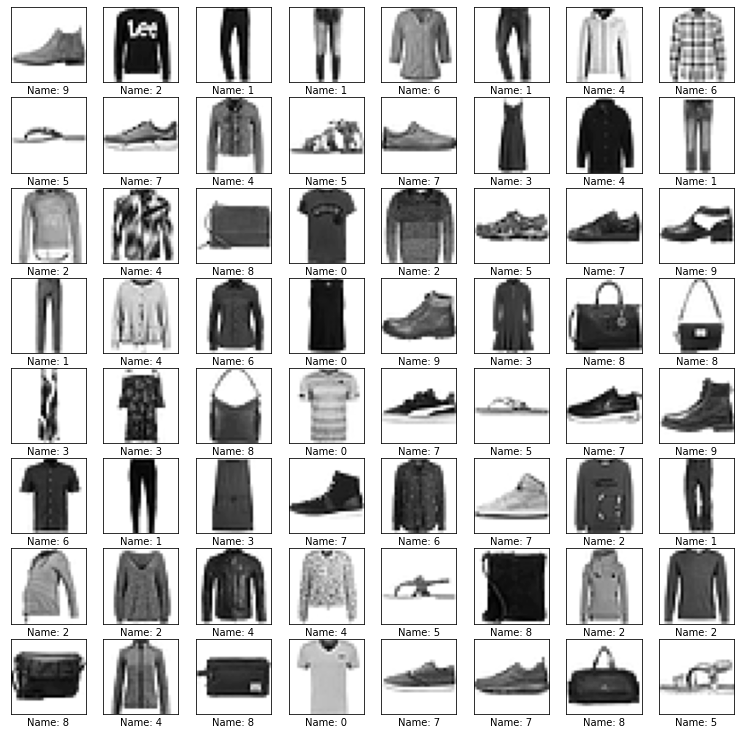

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

[train_images, train_labels], [test_images, test_labels] = fashion_mnist.load_data()

# Iterating `train` images
# plt.figure(figsize=(12, 20))
# for i in range(150):
#     plt.subplot(15, 10, i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     #plt.imshow( train_images[i] )
#     plt.imshow( train_images[i], cmap=plt.cm.binary )
#     plt.xlabel( f"Name: {train_labels[i]}" )

# plt.show()


# Plotting `test` images
plt.figure(figsize=(13, 13))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow( train_images[i] )
    plt.imshow( test_images[i], cmap=plt.cm.binary )
    plt.xlabel( f"Name: {test_labels[i]}" )

plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras          import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers   import Dense, Flatten
from tensorflow.keras.losses   import SparseCategoricalCrossentropy as SCC


[train_images, train_labels], [test_images, test_labels] = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

"""
# Step 1: Build the model
"""
model = Sequential( [
    Flatten( input_shape=(28, 28) ),         # 1. Reformat 2D matrix (28*28) image to 1D matrix (784*1)
    Dense(128, activation="relu"),           # 2. Neural layers connected densely (fully)
    Dense(10),                               # 3. Each node contains a score that indicates
                                             # the current image belongs to one of the 10 classes.
] ) 


"""
# Step 2: Compile the model

Compile manditory components:
    1. optimizer function
    2. losses function - Define how accurate the model is during training.
    3. metrics properties
"""
model.compile(
    optimizer="adam",
    loss=SCC(from_logits=True),              # Used when two or more label classes was defined
    metrics=["accuracy"]
)


"""
# Step 3: Train the model
Description: `feed` and train the model for fixed number of epoches
"""
model.fit(train_images,
          train_labels,
          epochs=10
)



Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 10.4329 - accuracy: 0.6611
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7365 - accuracy: 0.7194
Epoch 3/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.6415 - accuracy: 0.7435
Epoch 4/10
1875/1875 [==============================] - 2s 815us/step - loss: 0.5955 - accuracy: 0.7682
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5601 - accuracy: 0.7900
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5154 - accuracy: 0.8189
Epoch 7/10
1875/1875 [==============================] - 2s 824us/step - loss: 0.5092 - accuracy: 0.8268
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4904 - accuracy: 0.8308
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4721 - accuracy: 0.8361
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss

In [8]:
"""
     Evaluate neural network which has been built,
    by new datasets.
"""

t_loss, t_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Evaluation accuracy: {t_acc}")
print(f"Evaluation loss: {t_loss}")

313/313 - 0s - loss: 0.5772 - accuracy: 0.8087
Evaluation accuracy: 0.8087000250816345
Evaluation loss: 0.5771927237510681


In [9]:
from tensorflow.keras.layers import Softmax

"""
     Enhance previous model by Softmax layer
    for better prediction
"""
probability_model = Sequential([
    model,
    Softmax(),                                 # Convert logits to probabilities for easier interpretation
])

"""
     Predict accuracy of model by test images
"""
prediction = probability_model.predict(test_images)

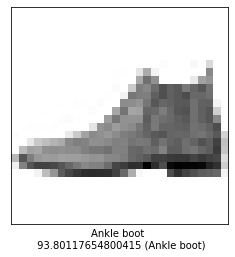

In [30]:
def draw_image(i, prediction, test_images, test_labels):
    
    # Expected data
    image, label = test_images[i], test_labels[i]
    
    # Predicted data
    predicted_data  = prediction[i]
    predicted_label = np.argmax( predicted_data )
    predicted_image = test_images[i]
    
    if not predicted_label == label: return

    # Plotting predicted image
    plt.figure()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow( predicted_image, cmap=plt.cm.binary )
#     plt.imshow( predicted_image )
#     plt.colorbar()
    label = f"{ class_names[predicted_label] } \n {100*np.max(predicted_data)} ({ class_names[label] })"
    plt.xlabel(label.center(20, ' '))
    plt.show()




# Call draw_image function
draw_image(0, prediction, test_images, test_labels)

# print(prediction[1])
# confidence = np.argmax(prediction[1])
# print( prediction.shape )
# print(f"\n[+] First test image fit with {class_names[ confidence ]} (index: {confidence})")

